In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import numpy as np

In [2]:
#Get URL

w_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(w_url)

response.status_code

200

In [3]:
cmhf_1 = BeautifulSoup(response.content, 'lxml')
print(cmhf_1.title)
print(cmhf_1)

<title>Hall of Fame Members | Country Music Hall of Fame</title>
<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports

In [4]:
vcards_t = cmhf_1.find_all('div', attrs = {'class': 'vertical-card_content--title'})
vcards_t

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

In [5]:
vcards_c = cmhf_1.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
vcards_c[0].get_text()

'\n\n                    Inducted 1962                  \n'

In [6]:
artists = []
for i in range(len(vcards_t)):
    name = vcards_t[i].get_text().replace("\n", "")
    artists.append(name)
print(artists)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [7]:
inducted = []
for i in range(len(vcards_c)):
    ind = vcards_c[i].get_text().replace("\n", "").strip()
    year = re.sub("[^0-9]", "", ind)
    inducted.append(year)
print(inducted)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


In [8]:
cmfa1_tuples = list(zip(artists, inducted))
cmfa1_df = pd.DataFrame(cmfa1_tuples, columns = ["artist", "year_inducted"])
print(cmfa1_df)

          artist year_inducted
0      Roy Acuff          1962
1        Alabama          2005
2  Bill Anderson          2001
3    Eddy Arnold          1966
4    Chet Atkins          1973
5     Gene Autry          1969
6  DeFord Bailey          2005
7     Bobby Bare          2013
8    Johnny Bond          1999


In [9]:
url_temp = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'
artists = []
inducted = []
web_address = []
for page in range(1,17):
    w_url = url_temp.format(page)
    response = requests.get(w_url)
    page_html = BeautifulSoup(response.content, 'lxml')
    vcards_t = page_html.find_all('div', attrs = {'class': 'vertical-card_content--title'})
    vcards_c = page_html.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
    vcards = page_html.find_all('div', class_='vertical-card_content') #Credit Teng
    for i in range(len(vcards_t)):
        name = vcards_t[i].get_text().replace("\n", "")
        artists.append(name)
    for i in range(len(vcards_c)):
        ind = vcards_c[i].get_text().replace("\n", "").strip()
        year = re.sub("[^0-9]", "", ind)
        inducted.append(year)
    for i in vcards: #Credit Teng
        link = i.a['href']
        web_address.append(link)
        
print(artists)
print(inducted)
print(web_address)


['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton', 'Harlan Howard', 'Ferlin Husky', 'Alan Jackson', 'Sonny Jam

In [10]:
cmhf_tuples = list(zip(artists, inducted, web_address))
cmhf_df = pd.DataFrame(cmhf_tuples, columns = ["artist", "year_inducted", "artist_link"])
print(cmhf_df)
cmhf_df['year_inducted'] = cmhf_df['year_inducted'].astype('int')

            artist year_inducted  \
0        Roy Acuff          1962   
1          Alabama          2005   
2    Bill Anderson          2001   
3      Eddy Arnold          1966   
4      Chet Atkins          1973   
..             ...           ...   
135  Hank Williams          1961   
136      Bob Wills          1968   
137    Mac Wiseman          2014   
138  Tammy Wynette          1998   
139    Faron Young          2000   

                                           artist_link  
0    https://countrymusichalloffame.org/artist/roy-...  
1    https://countrymusichalloffame.org/artist/alab...  
2    https://countrymusichalloffame.org/artist/bill...  
3    https://countrymusichalloffame.org/artist/eddy...  
4    https://countrymusichalloffame.org/artist/chet...  
..                                                 ...  
135  https://countrymusichalloffame.org/artist/hank...  
136  https://countrymusichalloffame.org/artist/bob-...  
137  https://countrymusichalloffame.org/artist/mac-...

(array([16., 15., 20., 21., 36., 32.]),
 array([1960, 1970, 1980, 1990, 2000, 2010, 2020]),
 <BarContainer object of 6 artists>)

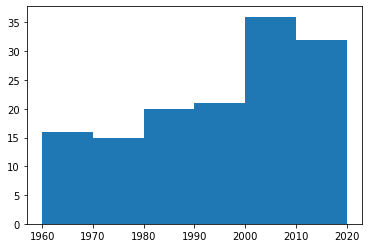

In [11]:
plt.hist(cmhf_df.year_inducted, bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020])

## Bonus

In [12]:
#Code here is for alternate approach to accessing artist web-pages: convert artist names to proper form, then
#iterate through the list to fill a variable position in the URL. This, however, is more labor-intensive and
#error-prone than simply scaping the site for hrefs.

url_names = []

for artist in artists:
    url_name = artist.replace('"', "").replace(".", "").replace(" ", "-").lower()
    url_names.append(url_name)
print(url_names)

url_names2 = []

for name in url_names:
    new_name = name.replace("\u200bjerry-reed", "\%E2\%80\%8Bjerry-reed")
    new_name2 = new_name.replace("hargus-“pig”-robbins", "hargus-pig-robbins")
    new_name3 = new_name2.replace("ernest-v-“pop”-stoneman", "ernest-v-pop-stoneman")
    new_name4 = new_name3.replace("e-w-“bud”-wendell", "e-w-bud-wendell")
    url_names2.append(new_name4)

print(url_names2)

['roy-acuff', 'alabama', 'bill-anderson', 'eddy-arnold', 'chet-atkins', 'gene-autry', 'deford-bailey', 'bobby-bare', 'johnny-bond', 'bobby-braddock', 'harold-bradley', 'jerry-bradley', 'owen-bradley', 'rod-brasfield', 'garth-brooks', 'brooks-&-dunn', 'jim-ed-brown', 'jim-ed-brown-and-the-browns', 'boudleaux-and-felice-bryant', 'glen-campbell', 'bill-carlisle', 'carter-family', 'johnny-cash', 'roy-clark', 'cowboy-jack-clement', 'patsy-cline', 'hank-cochran', 'paul-cohen', 'floyd-cramer', 'vernon-dalhart', 'charlie-daniels', 'jimmie-davis', 'jimmy-dean', 'delmore-brothers', 'jim-denny', 'little-jimmy-dickens', 'ralph-emery', 'the-everly-brothers', 'flatt-and-scruggs', 'jim-foglesong', 'red-foley', 'tennessee-ernie-ford', 'fred-foster', 'joseph-frank', 'lefty-frizzell', 'connie-b-gay', 'don-gibson', 'vince-gill', 'johnny-gimble', 'merle-haggard', 'tom-t-hall', 'emmylou-harris', 'george-d-hay', 'homer-and-jethro', 'roy-horton', 'harlan-howard', 'ferlin-husky', 'alan-jackson', 'sonny-james'

In [13]:
#Access individual artist page information, first attempt.
#Problem: tombstone info isn't always at the [5] location in the result set

w_url = 'https://countrymusichalloffame.org/artist/charley-pride/'
response = requests.get(w_url)
page_html = BeautifulSoup(response.content, 'lxml')
deets = page_html.find_all('p')
deets[5].get_text()

'Birth: March 18, 1934  Birthplace: Sledge, Mississippi '

In [14]:
#Access individual artist page information, improved method.

w_url = 'https://countrymusichalloffame.org/artist/frances-preston/'
response = requests.get(w_url)
soup = BeautifulSoup(response.content, 'lxml')
p = soup.find(string=re.compile("Birthplace"))

# for i in p:
#     if("Birth" in i.string):
#         print(i)
print(p)
# string_list = []
# for i in p:
#     new_string = i.get_text()
#     string_list.append(new_string)
    
# print(string_list)

 Birthplace: Nashville, Tennessee 


In [15]:
artist_page = 'https://countrymusichalloffame.org/artist/{artist_name}/'
artist_tombstones = []
artist_birthplaces = []
for artist in url_names2:
    w_url = artist_page.format(artist_name = artist)
    response = requests.get(w_url)
    soup = BeautifulSoup(response.content, 'lxml')
    tombstone = soup.find(string=re.compile("Birth|Death"))
    artist_tombstones.append(tombstone)
    bp = soup.find(string=re.compile("Birthplace"))
    artist_birthplaces.append(bp)

print(artist_tombstones)
print(artist_birthplaces)

['Birth: September 15, 1903 - Death: November 23, 1992 ', None, 'Birth: November 1, 1937 ', 'Birth: May 15, 1918 - Death: May 8, 2008 ', 'Birth: June 20, 1924 - Death: June 30, 2001 ', 'Birth: September 29, 1907 - Death: October 2, 1998 ', 'Birth: December 14, 1899 - Death: July 2, 1982 ', 'Birth: April 7, 1935 ', 'Birth: June 1, 1915 - Death: June 12, 1978 ', 'Birth: August 5, 1940 ', 'Birth: January 2, 1926 ', 'Birth: January 30, 1940 ', 'Birth: October 21, 1915 - Death: January 7, 1998 ', 'Birth: August 22, 1910 - Death: September 12, 1958 ', 'Birth: February 7, 1962 ', None, 'Birth: April 1, 1934 - Death: June 11, 2015 ', None, None, 'Birth: April 22, 1936 - Death: August 8, 2017 ', 'Birth: December 19, 1908 - Death: March 17, 2003 ', None, 'Birth: February 26, 1932 - Death: September 12, 2003 ', 'Birth: April 15, 1933 - Death: November 15, 2018 ', 'Birth: April 5, 1931 - Death: August 8, 2013 ', 'Birth: September 8, 1932 - Death: March 5, 1963 ', 'Birth: August 2, 1935 - Death: Ju

In [16]:
cmhf_df['tombstone'] = artist_tombstones
cmhf_df['birthplace'] = artist_birthplaces
print(cmhf_df)

            artist  year_inducted  \
0        Roy Acuff           1962   
1          Alabama           2005   
2    Bill Anderson           2001   
3      Eddy Arnold           1966   
4      Chet Atkins           1973   
..             ...            ...   
135  Hank Williams           1961   
136      Bob Wills           1968   
137    Mac Wiseman           2014   
138  Tammy Wynette           1998   
139    Faron Young           2000   

                                           artist_link  \
0    https://countrymusichalloffame.org/artist/roy-...   
1    https://countrymusichalloffame.org/artist/alab...   
2    https://countrymusichalloffame.org/artist/bill...   
3    https://countrymusichalloffame.org/artist/eddy...   
4    https://countrymusichalloffame.org/artist/chet...   
..                                                 ...   
135  https://countrymusichalloffame.org/artist/hank...   
136  https://countrymusichalloffame.org/artist/bob-...   
137  https://countrymusichalloffa

In [17]:
cmhf_df.iloc[1,:]

artist                                                     Alabama
year_inducted                                                 2005
artist_link      https://countrymusichalloffame.org/artist/alab...
tombstone                                                     None
birthplace                                                    None
Name: 1, dtype: object

In [18]:
cmhf_df[['birth', 'death']] = cmhf_df['tombstone'].str.split(' - ', expand = True)
cmhf_df

,artist,year_inducted,artist_link,tombstone,birthplace,birth,death
0,Roy Acuff,1962,https://countrymusichalloffame.org/artist/roy-...,"Birth: September 15, 1903 - Death: November 23...","Birthplace: Maynardville, Tennessee","Birth: September 15, 1903","Death: November 23, 1992"
1,Alabama,2005,https://countrymusichalloffame.org/artist/alab...,None,None,None,None
2,Bill Anderson,2001,https://countrymusichalloffame.org/artist/bill...,"Birth: November 1, 1937","Birthplace: Columbia, South Carolina","Birth: November 1, 1937",None
3,Eddy Arnold,1966,https://countrymusichalloffame.org/artist/eddy...,"Birth: May 15, 1918 - Death: May 8, 2008","Birthplace: Henderson, Tennessee","Birth: May 15, 1918","Death: May 8, 2008"
4,Chet Atkins,1973,https://countrymusichalloffame.org/artist/chet...,"Birth: June 20, 1924 - Death: June 30, 2001","Birthplace: Luttrell, Tennessee","Birth: June 20, 1924","Death: June 30, 2001"
...,...,...,...,...,...,...,...
135,Hank Williams,1961,https://countrymusichalloffame.org/artist/hank...,"Birth: September 17, 1923 - Death: January 1, ...","Birthplace: Mount Olive, Alabama","Birth: September 17, 1923","Death: January 1, 1953"
136,Bob Wills,1968,https://countrymusichalloffame.org/artist/bob-...,"Birth: March 6, 1905 - Death: May 13, 1975","Birthplace: Kosse, Texas","Birth: March 6, 1905","Death: May 13, 1975"
137,Mac Wiseman,2014,https://countrymusichalloffame.org/artist/mac-...,"Birth: May 23, 1925 - Death: February 24, 2019","Birthplace: Crimora, Virginia","Birth: May 23, 1925","Death: February 24, 2019"
138,Tammy Wynette,1998,https://countrymusichalloffame.org/artist/tamm...,"Birth: May 5, 1942 - Death: April 6, 1998","Birthplace: Itawamba County, Mississippi","Birth: May 5, 1942","Death: April 6, 1998"


In [19]:
cmhf_df['birth'] = cmhf_df['birth'].str.replace('Birth: ', "")#.str.lstrip()
cmhf_df['death'] = cmhf_df['death'].str.replace('Death: ', "")#.str.lstrip()
cmhf_df['birthplace'] = cmhf_df['birthplace'].str.replace('Birthplace:', "")
cmhf_df

,artist,year_inducted,artist_link,tombstone,birthplace,birth,death
0,Roy Acuff,1962,https://countrymusichalloffame.org/artist/roy-...,"Birth: September 15, 1903 - Death: November 23...","Maynardville, Tennessee","September 15, 1903","November 23, 1992"
1,Alabama,2005,https://countrymusichalloffame.org/artist/alab...,None,None,None,None
2,Bill Anderson,2001,https://countrymusichalloffame.org/artist/bill...,"Birth: November 1, 1937","Columbia, South Carolina","November 1, 1937",None
3,Eddy Arnold,1966,https://countrymusichalloffame.org/artist/eddy...,"Birth: May 15, 1918 - Death: May 8, 2008","Henderson, Tennessee","May 15, 1918","May 8, 2008"
4,Chet Atkins,1973,https://countrymusichalloffame.org/artist/chet...,"Birth: June 20, 1924 - Death: June 30, 2001","Luttrell, Tennessee","June 20, 1924","June 30, 2001"
...,...,...,...,...,...,...,...
135,Hank Williams,1961,https://countrymusichalloffame.org/artist/hank...,"Birth: September 17, 1923 - Death: January 1, ...","Mount Olive, Alabama","September 17, 1923","January 1, 1953"
136,Bob Wills,1968,https://countrymusichalloffame.org/artist/bob-...,"Birth: March 6, 1905 - Death: May 13, 1975","Kosse, Texas","March 6, 1905","May 13, 1975"
137,Mac Wiseman,2014,https://countrymusichalloffame.org/artist/mac-...,"Birth: May 23, 1925 - Death: February 24, 2019","Crimora, Virginia","May 23, 1925","February 24, 2019"
138,Tammy Wynette,1998,https://countrymusichalloffame.org/artist/tamm...,"Birth: May 5, 1942 - Death: April 6, 1998","Itawamba County, Mississippi","May 5, 1942","April 6, 1998"


In [20]:
#convert birth and death columns to datetime. maybe convert year_inducted.
cmhf_df['birth'] = pd.to_datetime(cmhf_df['birth'], format = '%B %d, %Y', errors = 'coerce')
cmhf_df['death'] = pd.to_datetime(cmhf_df['death'])
cmhf_df['year_inducted'] = pd.to_datetime(cmhf_df['year_inducted'], format = '%Y')
#cmhf_df['year_inducted'] = cmhf_df['year_inducted'].dt.year
cmhf_df

,artist,year_inducted,artist_link,tombstone,birthplace,birth,death
0,Roy Acuff,1962-01-01,https://countrymusichalloffame.org/artist/roy-...,"Birth: September 15, 1903 - Death: November 23...","Maynardville, Tennessee",1903-09-15,1992-11-23
1,Alabama,2005-01-01,https://countrymusichalloffame.org/artist/alab...,None,None,NaT,NaT
2,Bill Anderson,2001-01-01,https://countrymusichalloffame.org/artist/bill...,"Birth: November 1, 1937","Columbia, South Carolina",NaT,NaT
3,Eddy Arnold,1966-01-01,https://countrymusichalloffame.org/artist/eddy...,"Birth: May 15, 1918 - Death: May 8, 2008","Henderson, Tennessee",1918-05-15,2008-05-08
4,Chet Atkins,1973-01-01,https://countrymusichalloffame.org/artist/chet...,"Birth: June 20, 1924 - Death: June 30, 2001","Luttrell, Tennessee",1924-06-20,2001-06-30
...,...,...,...,...,...,...,...
135,Hank Williams,1961-01-01,https://countrymusichalloffame.org/artist/hank...,"Birth: September 17, 1923 - Death: January 1, ...","Mount Olive, Alabama",1923-09-17,1953-01-01
136,Bob Wills,1968-01-01,https://countrymusichalloffame.org/artist/bob-...,"Birth: March 6, 1905 - Death: May 13, 1975","Kosse, Texas",1905-03-06,1975-05-13
137,Mac Wiseman,2014-01-01,https://countrymusichalloffame.org/artist/mac-...,"Birth: May 23, 1925 - Death: February 24, 2019","Crimora, Virginia",1925-05-23,2019-02-24
138,Tammy Wynette,1998-01-01,https://countrymusichalloffame.org/artist/tamm...,"Birth: May 5, 1942 - Death: April 6, 1998","Itawamba County, Mississippi",1942-05-05,1998-04-06


In [21]:
cmhf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   artist         140 non-null    object        
 1   year_inducted  140 non-null    datetime64[ns]
 2   artist_link    140 non-null    object        
 3   tombstone      126 non-null    object        
 4   birthplace     125 non-null    object        
 5   birth          95 non-null     datetime64[ns]
 6   death          96 non-null     datetime64[ns]
dtypes: datetime64[ns](3), object(4)
memory usage: 7.8+ KB


In [22]:
#create lifespan column
cmhf_df['lifespan'] = (cmhf_df['death'] - cmhf_df['birth']) / np.timedelta64(1, 'Y')
cmhf_df

,artist,year_inducted,artist_link,tombstone,birthplace,birth,death,lifespan
0,Roy Acuff,1962-01-01,https://countrymusichalloffame.org/artist/roy-...,"Birth: September 15, 1903 - Death: November 23...","Maynardville, Tennessee",1903-09-15,1992-11-23,89.192797
1,Alabama,2005-01-01,https://countrymusichalloffame.org/artist/alab...,None,None,NaT,NaT,NaN
2,Bill Anderson,2001-01-01,https://countrymusichalloffame.org/artist/bill...,"Birth: November 1, 1937","Columbia, South Carolina",NaT,NaT,NaN
3,Eddy Arnold,1966-01-01,https://countrymusichalloffame.org/artist/eddy...,"Birth: May 15, 1918 - Death: May 8, 2008","Henderson, Tennessee",1918-05-15,2008-05-08,89.984052
4,Chet Atkins,1973-01-01,https://countrymusichalloffame.org/artist/chet...,"Birth: June 20, 1924 - Death: June 30, 2001","Luttrell, Tennessee",1924-06-20,2001-06-30,77.028276
...,...,...,...,...,...,...,...,...
135,Hank Williams,1961-01-01,https://countrymusichalloffame.org/artist/hank...,"Birth: September 17, 1923 - Death: January 1, ...","Mount Olive, Alabama",1923-09-17,1953-01-01,29.292867
136,Bob Wills,1968-01-01,https://countrymusichalloffame.org/artist/bob-...,"Birth: March 6, 1905 - Death: May 13, 1975","Kosse, Texas",1905-03-06,1975-05-13,70.186246
137,Mac Wiseman,2014-01-01,https://countrymusichalloffame.org/artist/mac-...,"Birth: May 23, 1925 - Death: February 24, 2019","Crimora, Virginia",1925-05-23,2019-02-24,93.759625
138,Tammy Wynette,1998-01-01,https://countrymusichalloffame.org/artist/tamm...,"Birth: May 5, 1942 - Death: April 6, 1998","Itawamba County, Mississippi",1942-05-05,1998-04-06,55.921751


In [25]:
cmhf_df['age_inducted'] = (cmhf_df['year_inducted'] - cmhf_df['birth']) / np.timedelta64(1, 'Y')
cmhf_df

,artist,year_inducted,artist_link,tombstone,birthplace,birth,death,lifespan,age_inducted
0,Roy Acuff,1962-01-01,https://countrymusichalloffame.org/artist/roy-...,"Birth: September 15, 1903 - Death: November 23...","Maynardville, Tennessee",1903-09-15,1992-11-23,89.192797,58.298254
1,Alabama,2005-01-01,https://countrymusichalloffame.org/artist/alab...,None,None,NaT,NaT,NaN,NaN
2,Bill Anderson,2001-01-01,https://countrymusichalloffame.org/artist/bill...,"Birth: November 1, 1937","Columbia, South Carolina",NaT,NaT,NaN,NaN
3,Eddy Arnold,1966-01-01,https://countrymusichalloffame.org/artist/eddy...,"Birth: May 15, 1918 - Death: May 8, 2008","Henderson, Tennessee",1918-05-15,2008-05-08,89.984052,47.634106
4,Chet Atkins,1973-01-01,https://countrymusichalloffame.org/artist/chet...,"Birth: June 20, 1924 - Death: June 30, 2001","Luttrell, Tennessee",1924-06-20,2001-06-30,77.028276,48.534878
...,...,...,...,...,...,...,...,...,...
135,Hank Williams,1961-01-01,https://countrymusichalloffame.org/artist/hank...,"Birth: September 17, 1923 - Death: January 1, ...","Mount Olive, Alabama",1923-09-17,1953-01-01,29.292867,37.293031
136,Bob Wills,1968-01-01,https://countrymusichalloffame.org/artist/bob-...,"Birth: March 6, 1905 - Death: May 13, 1975","Kosse, Texas",1905-03-06,1975-05-13,70.186246,62.824014
137,Mac Wiseman,2014-01-01,https://countrymusichalloffame.org/artist/mac-...,"Birth: May 23, 1925 - Death: February 24, 2019","Crimora, Virginia",1925-05-23,2019-02-24,93.759625,88.612360
138,Tammy Wynette,1998-01-01,https://countrymusichalloffame.org/artist/tamm...,"Birth: May 5, 1942 - Death: April 6, 1998","Itawamba County, Mississippi",1942-05-05,1998-04-06,55.921751,55.661649


In [51]:
cmhf_df.to_csv('cmhf.csv')

## Presentation Graphs & Charts

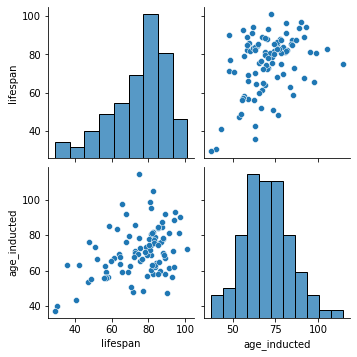

In [28]:
sns.pairplot(cmhf_df)

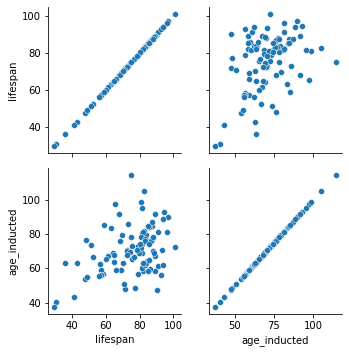

In [30]:
g = sns.PairGrid(cmhf_df)
g.map(sns.scatterplot)

<AxesSubplot:xlabel='lifespan', ylabel='Count'>

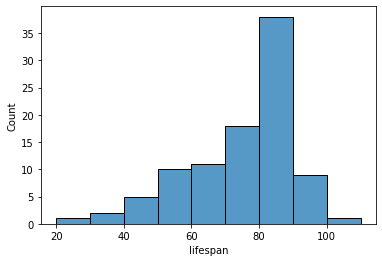

In [34]:
sns.histplot(cmhf_df['lifespan'], bins = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110])

<AxesSubplot:xlabel='age_inducted', ylabel='Count'>

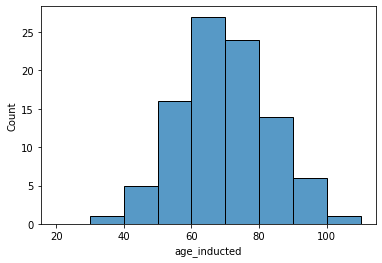

In [35]:
sns.histplot(cmhf_df['age_inducted'], bins = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110])

<AxesSubplot:ylabel='Count'>

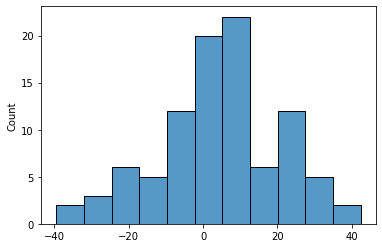

In [36]:
sns.histplot(cmhf_df['lifespan']-cmhf_df['age_inducted'])

<AxesSubplot:xlabel='year_inducted'>

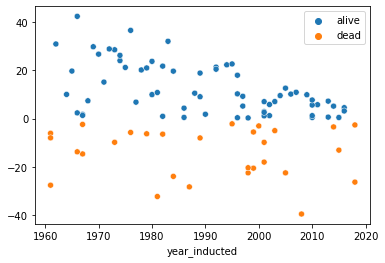

In [59]:
ind_to_dead = cmhf_df['lifespan']-cmhf_df['age_inducted']
DOA  = []
for i in ind_to_dead:
    if i > 0:
        val = "alive"
        DOA.append(val)
    else:
        val = "dead"
        DOA.append(val)

sns.scatterplot(x = cmhf_df['year_inducted'], y = cmhf_df['lifespan']-cmhf_df['age_inducted'], hue = DOA)

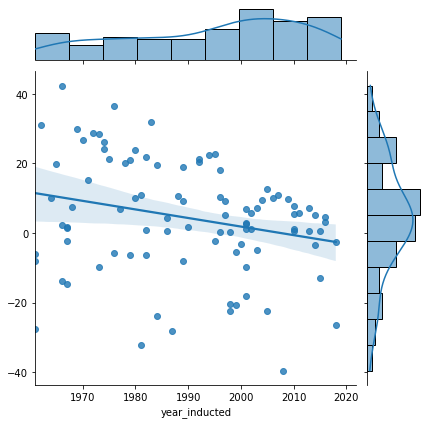

In [70]:
sns.jointplot(x = cmhf_df['year_inducted'].dt.year, y = cmhf_df['lifespan']-cmhf_df['age_inducted'], kind = 'reg')

<AxesSubplot:xlabel='year_inducted', ylabel='age_inducted'>

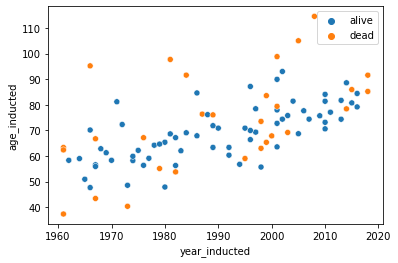

In [52]:
sns.scatterplot(x = cmhf_df['year_inducted'], y = cmhf_df['age_inducted'], hue = DOA)

## Accessing Individual Artist Pages

In [23]:
#Lifting individual artist-page URLs from first members page

b_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(b_url)
soup = BeautifulSoup(response.content, 'lxml')

d = soup.find_all('div', class_='vertical-card_content')
d

web_address = []

for element in d:
    link = element.a['href']
    web_address.append(link)

print(web_address)

['https://countrymusichalloffame.org/artist/roy-acuff/', 'https://countrymusichalloffame.org/artist/alabama/', 'https://countrymusichalloffame.org/artist/bill-anderson/', 'https://countrymusichalloffame.org/artist/eddy-arnold/', 'https://countrymusichalloffame.org/artist/chet-atkins/', 'https://countrymusichalloffame.org/artist/gene-autry/', 'https://countrymusichalloffame.org/artist/deford-bailey/', 'https://countrymusichalloffame.org/artist/bobby-bare/', 'https://countrymusichalloffame.org/artist/johnny-bond/']


In [24]:
url_temp = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'

web_address = []
for page in range(1,17):
    w_url = url_temp.format(page)
    response = requests.get(w_url)
    soup = BeautifulSoup(response.content, 'lxml')
#     vcards_t = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
#     vcards_c = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
    d = soup.find_all('div', class_='vertical-card_content') #Credit Teng
#     for i in range(len(vcards_t)):
#         name = vcards_t[i].get_text().replace("\n", "")
#         artists.append(name)
#     for i in range(len(vcards_c)):
#         ind = vcards_c[i].get_text().replace("\n", "").strip()
#         year = re.sub("[^0-9]", "", ind)
#         inducted.append(year)
    for i in d: #Credit Teng
        link = i.a['href']
        web_address.append(link)
        
# print(artists)
# print(inducted)
print(web_address)

['https://countrymusichalloffame.org/artist/roy-acuff/', 'https://countrymusichalloffame.org/artist/alabama/', 'https://countrymusichalloffame.org/artist/bill-anderson/', 'https://countrymusichalloffame.org/artist/eddy-arnold/', 'https://countrymusichalloffame.org/artist/chet-atkins/', 'https://countrymusichalloffame.org/artist/gene-autry/', 'https://countrymusichalloffame.org/artist/deford-bailey/', 'https://countrymusichalloffame.org/artist/bobby-bare/', 'https://countrymusichalloffame.org/artist/johnny-bond/', 'https://countrymusichalloffame.org/artist/bobby-braddock/', 'https://countrymusichalloffame.org/artist/harold-bradley/', 'https://countrymusichalloffame.org/artist/jerry-bradley/', 'https://countrymusichalloffame.org/artist/owen-bradley/', 'https://countrymusichalloffame.org/artist/rod-brasfield/', 'https://countrymusichalloffame.org/artist/garth-brooks/', 'https://countrymusichalloffame.org/artist/brooks-dunn/', 'https://countrymusichalloffame.org/artist/jim-ed-brown/', 'htt